In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

#set directory path for dataset
os.chdir("/content/drive/My Drive/Project/Face Mask Detection")
Dataset = 'dataset'
Data_Dir = os.listdir(Dataset)
print(Data_Dir)



['with_mask', 'without_mask']


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
img_rows, img_cols = 112,112

images =[]
labels = []


In [ ]:
for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:

      #convert the image into gray scale
      grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      #resizing the gray scaled image into size of 56x56 in order to keep size of the images consistent
      resized_img = cv2.resize(grayscale_img, (img_rows,img_cols))
      images.append(resized_img)
      labels.append(category)

    #Exception Handling in case any error occurs
    except Exception as e:
      print('Exception:', e)  

In [ ]:
images = np.array(images)/255
images = np.reshape(images, (images.shape[0],img_rows,img_cols,1))

In [ ]:
#perform one hot encoding on the labels since the label are in texture form
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels  = np.array(labels)


In [ ]:
(train_X, text_X, train_y, test_y)= train_test_split(images, labels, test_size = 0.25,
                                                     random_state=0) 

## CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPool2D

In [ ]:
#define model parameters
num_classes = 2

In [ ]:
model = Sequential()

In [ ]:
#first layer 

model.add(Conv2D(64,(3,3),input_shape =(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
#second layer

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
# Flatten and Dropout Layer

model.add(Flatten())
model.add(Dropout(0.5))

In [ ]:
# softmax Classifier

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
fitted_model = model.fit(
    
    train_X,
    train_y,
    epochs = 50,
    validation_split=0.25)

Epoch 1/50
25/25 [==============================] - 1s 32ms/step - loss: 0.7635 - accuracy: 0.5271 - val_loss: 0.6558 - val_accuracy: 0.6783
Epoch 2/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6352 - accuracy: 0.6486 - val_loss: 0.5751 - val_accuracy: 0.7984
Epoch 3/50
25/25 [==============================] - 1s 24ms/step - loss: 0.5235 - accuracy: 0.7571 - val_loss: 0.3773 - val_accuracy: 0.8760
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3599 - accuracy: 0.8605 - val_loss: 0.3099 - val_accuracy: 0.8798
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 0.2812 - accuracy: 0.8979 - val_loss: 0.2452 - val_accuracy: 0.8915
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 0.2024 - accuracy: 0.9251 - val_loss: 0.2075 - val_accuracy: 0.9070
Epoch 7/50
25/25 [==============================] - 1s 23ms/step - loss: 0.1626 - accuracy: 0.9367 - val_loss: 0.2047 - val_accuracy: 0.9147
Epoch 8/50
25


Plot the training Loss and Accuracy
---



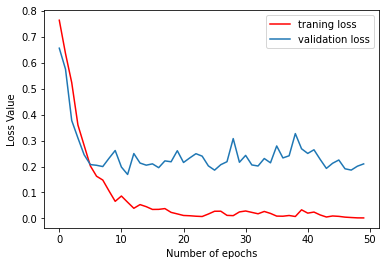

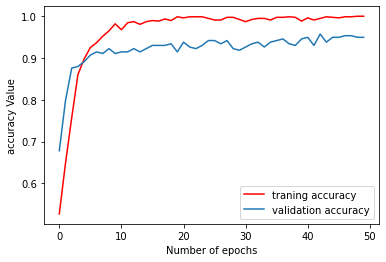

In [ ]:
from matplotlib import pyplot as plt

#plot Training and Validation Loss
plt.plot(fitted_model.history['loss'], 'r', label = 'traning loss')
plt.plot(fitted_model.history['val_loss'], label = 'validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

#plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'], 'r', label = 'traning accuracy')
plt.plot(fitted_model.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy Value')
plt.legend()
plt.show()

In [ ]:
#save the model
model.save('face_mask_detection.h5')